In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.io
from scipy import sparse
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, f1_score
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from collections import OrderedDict


In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#nltk.download('punkt')
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
import tldextract

In [3]:
ANY_URL_REGEX = re.compile(r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))""")


In [4]:
import tensorflow as tf

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Bidirectional, LSTM, concatenate, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TextVectorization

In [5]:
data = pd.read_excel("dbb4c4ff1f31-CAC+2022_Training+Data+Set+New.xlsx")


In [6]:
data_tr = data.copy()
data_tr.drop('payment_reporting_category', inplace=True, axis=1)

In [7]:
data_tr.Category.value_counts()

Retail Trade                                 13500
Entertainment                                11255
Trade, Professional and Personal Services     5275
Health and Community Services                 4157
Services to Transport                         2317
Travel                                        1489
Property and Business Services                1095
Education                                      445
Communication Services                         282
Finance                                        185
Name: Category, dtype: int64

In [8]:
# One-hot encoding for labels
Y = data_tr["Category"]
onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
category = onehot_encoder.fit_transform(Y.values.reshape(-1,1))

In [9]:
data_tr['merchant_cat_code'] = pd.cut(data_tr['merchant_cat_code'], bins=[0,699,999,1499,2999,3999,4799,4999,5499,5599,5699,5999,7299,7529,7799,7999,8999,9199,9402,10000], right=True, labels=False)+1


In [10]:
data_tr['location'] = data_tr.default_location.str[-2:]


In [11]:
data_tr.loc[data_tr['is_international']==True,'location'] = 'OT'

In [12]:
len(list(data_tr.location.value_counts()))

152

In [13]:
data_tr.amt = data_tr.amt.astype('int')
#(data_tr.sort_values(by='amt',ascending=False).head(100))
data_tr[['amt']] = scaler.fit_transform(data_tr[['amt']])
data_tr.amt.describe()

count    40000.000000
mean         0.003238
std          0.010921
min          0.000000
25%          0.000601
50%          0.001244
75%          0.002702
max          1.000000
Name: amt, dtype: float64

In [14]:
category

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
data_tr.head()

,sor,cdf_seq_no,trans_desc,merchant_cat_code,amt,db_cr_cd,payment_category,is_international,default_brand,default_location,qrated_brand,coalesced_brand,Category,location
0,HH,T20110701260061756,RECUR DEBIT CRD PMT11/11 DELTA DENTAL OF A11 O...,12.0,0.002488,D,Debit Card,False,DELTA DENTAL OF A11 OF,111-1111111 AR,Delta Dental,Delta Dental,Finance,AR
1,HH,T201302289909010349,"CHECK CRD PURCHASE 11/11 SURETY SOLUTIONS, ...",NaN,0.004418,D,Check Card,False,"SURETY SOLUTIONS,",111-111-1111 OR,Surety Solutions,Surety Solutions,Finance,OR
2,HH,T20130726991361190114550,CHECK CRD PURCHASE 11/11 THE COPY STOP ...,NaN,0.000944,D,Check Card,False,THE COPY STOP,SALT LAKE CIT UT,The Copy Stop,The Copy Stop,Finance,UT
3,BK,T201207095780929968,MARKET ALERT INC 111-111-1111 TX,13.0,0.000944,NaN,Credit Card,False,MARKET ALERT INC,111-111-1111 TX,Market Alert,Market Alert,Finance,TX
4,HH,T20131230990558080004939,CHECK CRD PURCHASE 11/11 PERT- NER PERFECT ...,NaN,0.002831,D,Check Card,False,PERT- NER PERFECT,THE WOODLANDS TX,Hometown Insurance Partners,Hometown Insurance Partners,Finance,TX


In [16]:
data_tr['coalesced_brand'] = data_tr['coalesced_brand'].str.lower()
data_tr['default_brand'] = data_tr['default_brand'].str.lower()
data_tr['trans_desc'] = data_tr['trans_desc'].str.lower()
######  CREATING URL COLUMN
data_tr['url_1'] = data_tr['coalesced_brand'].str.extract(ANY_URL_REGEX, expand=False)
data_tr['url_2'] = data_tr['coalesced_brand'].str.extract(ANY_URL_REGEX, expand=False).apply(lambda url: tldextract.extract(url).domain if pd.notnull(url) else '')
#data_tr['aaa'] = data_tr['coalesced_brand'].str.replace(data_tr['url_1'],data_tr['url_2'].str)
data_tr['coalesced_brand'] = data_tr.apply(lambda x: str(x['coalesced_brand']).replace(str(x['url_1']),x['url_2']), axis=1)
data_tr['default_brand'] = data_tr.apply(lambda x: str(x['default_brand']).replace(str(x['url_1']),x['url_2']), axis=1)
data_tr['trans_desc'] = data_tr.apply(lambda x: str(x['trans_desc']).replace(str(x['url_1']),x['url_2']), axis=1)


In [17]:
list(data_tr['trans_desc'])

['recur debit crd pmt11/11 delta dental of a11 of  111-1111111   ar 111111xxxxxx1111 111111111111111                               ?mcc=1111 11',
 'check crd purchase 11/11 surety solutions,       111-111-1111  or 111111xxxxxx1111 111111111111111                               ?mcc=1111',
 'check crd purchase 11/11 the copy stop           salt lake cit ut 111111xxxxxx1111 111111111111111                               ?mcc=1111',
 'market alert inc         111-111-1111 tx',
 'check crd purchase 11/11 pert- ner perfect       the woodlands tx 111111xxxxxx1111 111111111111111                               ?mcc=1111',
 'check crd purchase 11/11 ezee title loans        111-111-1111  az 111111xxxxxx1111 111111111111111                               ?mcc=1111 11',
 'check crd purchase 11/11 mirage insurance agenc  phoenix       az 111111xxxxxx1111 111111111111111                               ?mcc=1111 11',
 'check crd purchase 11/11 allied cust fic      111-111-1111  nj 111111xxxxxx1111 111111

In [18]:
#for i in range(len(data_tr)):
    ######  REMOVING STOP WORDS
    # print(data_tr.loc[i,'coalesced_brand'])
    #word_tokens = word_tokenize(data_tr.loc[i,'coalesced_brand'])
    #data_tr.loc[i,'coalesced_brand'] = ' '.join([w for w in word_tokens if not w in stop_words])
    
#data_tr['url'] = data_tr['coalesced_brand'].str.extract(ANY_URL_REGEX, expand=False).apply(lambda url: tldextract.extract(url).domain if pd.notnull(url) else '')
#data_tr['domain'] = data_tr['url'].apply(lambda url: tldextract.extract(url).domain if pd.notnull(url) else '')
data_tr['city'] = data_tr.default_location.str[:-3]
data_tr['coalesced_brand'] = data_tr['default_brand'].str.lower().astype('str') + ' ' + data_tr['coalesced_brand'].str.lower().astype('str') + ' ' + data_tr.city.astype('str') + ' ' + data_tr['trans_desc'].str.lower().astype('str')


In [19]:
data_tr.loc[49,'coalesced_brand']

'nrg           11111111 c nrg fleet FORT WORTH check crd purchase 11/11 nrg           11111111  fort worth    tx 111111xxxxxx1111 111111111111111                               ?mcc=1111 11'

In [20]:
data_tr['coalesced_brand'] = data_tr['coalesced_brand'].str.lower()
# REMOVING THE SAME WORDS IN THE "coalesced_brand" COLUMN
data_tr['coalesced_brand'] = (data_tr['coalesced_brand']
                              .apply(lambda x: OrderedDict.fromkeys(x.split()).keys())
                              .str.join(' '))

In [21]:
#####  REMOVING ALL NUMBERS (HOWEVER THERE SHOULD BE BETTER THING TO DO)
data_tr['coalesced_brand'].replace(to_replace=r'[0-9]*',value=r'', regex=True, inplace=True)
######  REMOVING SPECIAL CHARACTERS 
data_tr['coalesced_brand'].replace(to_replace=r'[^A-Za-z ]',value=r' ', regex=True, inplace=True)
######  REMOVING ALL SINGLE LETTERS
data_tr['coalesced_brand'].replace(to_replace=r'\b\w\b',value=r'', regex=True, inplace=True)
######  REMOVING MULTIPLE SPACES WITH SINGLE SPACE
data_tr['coalesced_brand'].replace(to_replace=r'\s+',value=r' ', regex=True, inplace=True)
data_tr['coalesced_brand'] = data_tr['coalesced_brand'].fillna('')
######  REMOVING STOP WORDS
data_tr['coalesced_brand'] = data_tr['coalesced_brand'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
######  REMOVING FIRST SPACE FROM CELL
data_tr['coalesced_brand'].replace(to_replace=r'^ ',value=r'', regex=True, inplace=True)


In [22]:
data_tr['coalesced_brand'] = data_tr['coalesced_brand'].str.replace('mcc', '')
data_tr['coalesced_brand'] = data_tr['coalesced_brand'].str.replace('xxxxxx', '')
#data_tr['coalesced_brand'] = data_tr['coalesced_brand'].str[:-2]
data_tr['coalesced_brand'][1]

'surety solutions solutions check crd purchase  '

In [23]:
data_tr['coalesced_brand'][11]

'forex nj'

In [24]:
data_tr = pd.get_dummies(data_tr, columns=["sor","db_cr_cd","is_international","merchant_cat_code","payment_category","location"])
#data_tr


In [25]:
data_tr.loc[49, 'coalesced_brand']

'nrg fleet fort worth check crd purchase tx  '

In [26]:
#data_tr['coalesced_brand'] = data_tr['coalesced_brand'] + data_tr['url']

In [27]:
max(data_tr['coalesced_brand'].str.split().str.len())

20

In [28]:
(data_tr['coalesced_brand'].str.split().str.len()).mean()

8.45385

In [29]:
data_tr, data_val, category_tr, category_val = train_test_split(data_tr, category, test_size=0.2, random_state=123)


In [30]:
#data_tr.head()

In [31]:
data_tr_nlp = data_tr['coalesced_brand']
data_val_nlp = data_val['coalesced_brand']
data_tr.drop(["coalesced_brand","cdf_seq_no","trans_desc","default_brand","qrated_brand","url_1","url_2","city","Category","default_location"], inplace=True, axis=1)
data_val.drop(["coalesced_brand","cdf_seq_no","trans_desc","default_brand","qrated_brand","url_1","url_2","city","Category","default_location"], inplace=True, axis=1)
#data_tr

In [32]:
list(data_tr_nlp.tail())

['nejame sons danbury check crd purchase ct  ',
 'stoney mesa winery lt winery check crd purchase co  ',
 'champlin athletic check crd purchase mn  ',
 'martin tailor orlando check crd purchase fl  ',
 'terrys food drug orderville check crd purchase ut  ']

In [33]:
seq_length = 20
embedding_size = 15
input_dim = 32000
meta_input_shape = 180


In [34]:
vectorize_layer = TextVectorization(
    #standardize=custom_standardization,
    max_tokens=input_dim,
    output_mode='int',
    output_sequence_length=seq_length)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
#text_ds = train_ds.map(lambda x, y: x)
vectorize_layer.adapt(data_tr_nlp)

2022-07-01 18:18:29.218677: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-01 18:18:29.415346: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [35]:
len(vectorize_layer.get_vocabulary())

31185

In [36]:
vectorize_layer.get_vocabulary()[1]

'[UNK]'

In [37]:
#padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [38]:
nlp_input = Input(shape=(1,), dtype='string')
x = vectorize_layer(nlp_input)

In [39]:
nlp_input.shape

TensorShape([None, 1])

In [40]:
meta_input = Input(shape=(meta_input_shape,), name='meta_input')

In [41]:
emb = Embedding(output_dim=embedding_size, input_dim=input_dim, input_length=seq_length)(x)
#emb = Dropout(0.3)(emb)
#emb = Bidirectional(LSTM(10, return_sequences=True))(emb)
#emb = Bidirectional(LSTM(64, return_sequences=True))(emb)
nlp_out = Bidirectional(LSTM(embedding_size, dropout=0.3, recurrent_dropout=0.3))(emb)


In [42]:
x = concatenate([nlp_out, meta_input])
x = Dense(200, activation='relu')(x)
x= Dropout(.3)(x)
x = Dense(128, activation='relu')(x)
x= Dropout(.3)(x)
x = Dense(64, activation='relu')(x)
#x= Dropout(.3)(x)
#x = Dense(32, activation='relu')(x)
#x= Dropout(.3)(x)
x = Dense(10, activation='softmax')(x)
model = Model(inputs=[nlp_input , meta_input], outputs=[x])

In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [44]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
text_vectorization (TextVectori (None, 20)           0           input_1[0][0]                    
__________________________________________________________________________________________________
embedding (Embedding)           (None, 20, 15)       480000      text_vectorization[0][0]         
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 30)           3720        embedding[0][0]                  
______________________________________________________________________________________________

In [45]:
tf.keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [46]:
pip install graphviz

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [47]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")
history = model.fit([data_tr_nlp, data_tr], category_tr, 
          batch_size=32, 
          epochs=5, 
          validation_data=([data_val_nlp, data_val], category_val), 
          callbacks=[tensorboard_callback])
          

2022-07-01 18:18:44.119364: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-07-01 18:18:44.119410: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-07-01 18:18:44.121254: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/5
   2/1000 [..............................] - ETA: 4:51 - loss: 2.3177 - acc: 0.1250   

2022-07-01 18:18:51.680759: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-07-01 18:18:51.680793: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-07-01 18:18:51.734536: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-07-01 18:18:51.837674: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-07-01 18:18:51.950167: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2022_07_01_18_18_51

2022-07-01 18:18:51.997376: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_07_01_18_18_51/Ehsans-MacBook-Air.local.trace.json.gz
2022-07-01 18:18:52.100997: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2022_07_01_18_18_51

2022-07-01 18:18:

1000/1000 [==============================] - 50s 43ms/step - loss: 1.1436 - acc: 0.6100 - val_loss: 0.8535 - val_acc: 0.7286
Epoch 2/5
1000/1000 [==============================] - 42s 42ms/step - loss: 0.6999 - acc: 0.7858 - val_loss: 0.7972 - val_acc: 0.7464
Epoch 3/5
1000/1000 [==============================] - 43s 43ms/step - loss: 0.4912 - acc: 0.8552 - val_loss: 0.8372 - val_acc: 0.7461
Epoch 4/5
1000/1000 [==============================] - 44s 44ms/step - loss: 0.3757 - acc: 0.8883 - val_loss: 0.9305 - val_acc: 0.7316
Epoch 5/5
1000/1000 [==============================] - 43s 43ms/step - loss: 0.2977 - acc: 0.9113 - val_loss: 0.9775 - val_acc: 0.7254


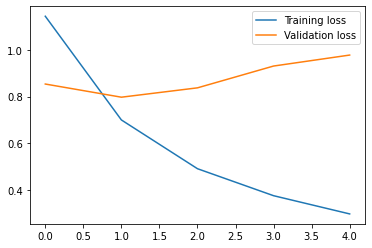

In [48]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

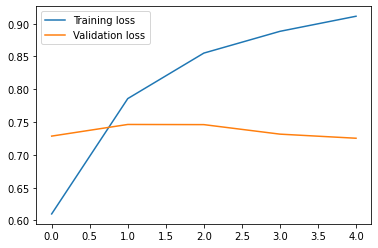

In [49]:
plt.plot(history.history['acc'], label='Training loss')
plt.plot(history.history['val_acc'], label='Validation loss')
plt.legend()

In [ ]:
#docs_infra: no_execute
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
model

Ta in ghesmat mohem hastesh, Baghiyeh mortabet nist

In [ ]:
import io
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import TextVectorization

In [ ]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1.tar.gz", url,
                                  untar=True, cache_dir='.',
                                  cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')
os.listdir(dataset_dir)

In [ ]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

In [ ]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

In [ ]:
batch_size = 1024
seed = 123
train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', batch_size=batch_size, validation_split=0.2,
    subset='training', seed=seed)
val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', batch_size=batch_size, validation_split=0.2,
    subset='validation', seed=seed)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Embed a 1,000 word vocabulary into 5 dimensions.
embedding_layer = tf.keras.layers.Embedding(1000, 5)

In [ ]:
# Create a custom standardization function to strip HTML break tags '<br />'.
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html,
                                    '[%s]' % re.escape(string.punctuation), '')


# Vocabulary size and number of words in a sequence.
vocab_size = 10000
sequence_length = 100

# Use the text vectorization layer to normalize, split, and map strings to
# integers. Note that the layer uses the custom standardization defined above.
# Set maximum_sequence length as all samples are not of the same length.
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sequence_length)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_ds = train_ds.map(lambda x, y: x)
vectorize_layer.adapt(text_ds)

In [ ]:
embedding_dim=16

model = Sequential([
  vectorize_layer,
  Embedding(vocab_size, embedding_dim, name="embedding"),
  GlobalAveragePooling1D(),
  Dense(16, activation='relu'),
  Dense(1)
])

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=[tensorboard_callback])

In [ ]:
#docs_infra: no_execute
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
nlp_input = Input(shape=(seq_length,), name='nlp_input')
meta_input = Input(shape=(10,), name='meta_input')
emb = Embedding(output_dim=embedding_size, input_dim=100, input_length=seq_length)(nlp_input)
nlp_out = Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, kernel_regularizer=regularizers.l2(0.01)))(emb)
x = concatenate([nlp_out, meta_input])
x = Dense(32, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
model = Model(inputs=[nlp_input , meta_input], outputs=[x])

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 6
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

def preprocess_text(df,column):
    df[column] = df[column].fillna('')

    df[column] = df[column].str.lower()
    
    for i in range(len(df)):
        ######  REMOVING SPECIAL CHARACTERS
        print(df.loc[i,column])
        df.loc[i,column]  = re.sub(r'[^A-Za-z0-9 ]',' ',((df.loc[i,column])))
        word_tokens = word_tokenize(df.loc[i,column])
        df.loc[i,column] = ' '.join([w for w in word_tokens if not w in stop_words])
        
        
        ######  REMOVING ALL SINGLE CHARACTERS
        df.loc[i,column]  = re.sub(r'\b\w\b','',str(df.loc[i,column]))
        df.loc[i,column]  = re.sub(r'\b[0-9]*\b','',str(df.loc[i,column]))
    
        ######  REMOVING MULTIPLE SPACES WITH SINGLE SPACE
        df.loc[i,column]  = re.sub(r'\s+',' ',str(df.loc[i,column]))
        df.loc[i,column]  = re.sub(r'^ ','',str(df.loc[i,column]))
        # print(df.loc[i,column])
    return df


data = preprocess_text(data_tr.copy(),'coalesced_brand')

# data[input_column].head()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime as dt
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

startdate=dt(2018,3,31)
enddate=dt(2022,3,31)

tickers = ['ETH-USD']
Data=pdr.get_data_yahoo(tickers,start=startdate, end=enddate)['Adj Close']

df_change = Data.apply(lambda x: np.log(x) - np.log(x.shift(1)))
df_change.drop(index=df_change.index[0], axis=0, inplace=True)
df_change = df_change*100

pd.options.mode.chained_assignment = None  #to not display the error of copy dataframe

df_y = df_change.copy()
df_y.columns = ['ETH-y']

def Target(df,column,df2,column2):
    for i in range(len(df)):
        if df[column].iloc[i] > 0:
            df2[column2][i] = 1   #value is up par rapport au jour d'avant
        elif -0.5 < df[column].iloc[i] < 0.5 :
            df2[column2][i] = 0    #value is steady
        else:
            df2[column2][i] = -1   #value is down 
        
Target(df_change,'ETH-USD',df_y,'ETH-y')  
print(df_y['ETH-y'].value_counts())

Data.drop(index=Data.index[0], axis=0, inplace=True)  #drop first row to have same values

X = Data
y = df_y
print(X)
## split my train val and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#reshaping for 3D array
X_train = np.reshape(X_train,(1169,1,1))
X_test = np.reshape(X_test,(293,1,1))
input_shape = X_train.shape
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(Bidirectional(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True)))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1]))
model.compile(optimizer='adam', loss='mse')
model.build(input_shape)
model.summary()
print(input_shape)
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2, verbose=1)
pred = model.predict(X_test)
print(np.argmax(pred, axis=-1))
pred = sc.inverse_transform(pred)
print(np.argmax(pred, axis=-1))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()